# <h1> <font color="teal"> Importing Libraries : </font> </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from collections import defaultdict
import pickle
from sklearn.metrics.pairwise import cosine_distances
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.spatial import distance
import random

### <h1> <font color="teal"> Importing The Pre-Processed Files : </font> </h1> 

In [2]:
file_path_content = '/Users/mukesh/Documents/01-Dissertation/final/content.csv'
content = pd.read_csv(file_path_content)

In [3]:
file_path_movies = '/Users/mukesh/Documents/01-Dissertation/final/movies.csv'
movies = pd.read_csv(file_path_movies)

In [4]:
file_path_ratings = '/Users/mukesh/Documents/01-Dissertation/final/ratings.csv'
ratings = pd.read_csv(file_path_ratings)

In [5]:
file_path_user_movie = '/Users/mukesh/Documents/01-Dissertation/final/user_movie.csv'
user_movie = pd.read_csv(file_path_user_movie, index_col=0)

###  <h1> <font color="teal"> Exploratory Data Analysis :    </font> </h1> 

In [6]:
movies.isnull().sum()

movieId    0
title      0
genres     0
year       0
dtype: int64

In [7]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
ratings["rating"].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62013 entries, 0 to 62012
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62013 non-null  int64 
 1   title    62013 non-null  object
 2   genres   62013 non-null  object
 3   year     62013 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [11]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62013 entries, 0 to 62012
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   movieId             62013 non-null  int64
 1   year                62013 non-null  int64
 2   (no genres listed)  62013 non-null  int64
 3   Action              62013 non-null  int64
 4   Adventure           62013 non-null  int64
 5   Animation           62013 non-null  int64
 6   Children            62013 non-null  int64
 7   Comedy              62013 non-null  int64
 8   Crime               62013 non-null  int64
 9   Documentary         62013 non-null  int64
 10  Drama               62013 non-null  int64
 11  Fantasy             62013 non-null  int64
 12  Film-Noir           62013 non-null  int64
 13  Horror              62013 non-null  int64
 14  IMAX                62013 non-null  int64
 15  Musical             62013 non-null  int64
 16  Mystery             62013 non-null  int6

In [12]:
movies.describe()

,movieId,year
count,62013.000000,62013.000000
mean,121895.531953,1992.044700
std,63320.572248,25.364884
min,1.000000,1874.000000
25%,81698.000000,1976.000000
50%,137614.000000,2002.000000
75%,173009.000000,2012.000000
max,209171.000000,2019.000000


In [13]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [14]:
content.describe()

,movieId,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,62013.000000,62013.000000,62013.000000,62013.000000,62013.000000,62013.000000,62013.000000,62013.000000,62013.000000,62013.000000,...,62013.000000,62013.000000,62013.000000,62013.000000,62013.000000,62013.000000,62013.000000,62013.000000,62013.000000,62013.000000
mean,121895.531953,1992.044700,0.077371,0.118282,0.066696,0.047200,0.047248,0.271620,0.085692,0.089675,...,0.005692,0.096270,0.003145,0.016980,0.047103,0.124297,0.057778,0.139180,0.030219,0.022560
std,63320.572248,25.364884,0.267181,0.322944,0.249496,0.212068,0.212171,0.444799,0.279911,0.285718,...,0.075233,0.294964,0.055988,0.129198,0.211861,0.329922,0.233325,0.346138,0.171192,0.148496
min,1.000000,1874.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81698.000000,1976.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,137614.000000,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,173009.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,209171.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
action_movies = movies[movies['genres'].str.contains('Action')]
action_ratings = ratings[ratings['movieId'].isin(action_movies['movieId'])]
print(f"Average rating for Action movies: {action_ratings['rating'].mean()}")

Average rating for Action movies: 3.466560451800723


In [16]:
drama_movies = movies[movies['genres'].str.contains('Drama')]
drama_ratings = ratings[ratings['movieId'].isin(drama_movies['movieId'])]
print(f"Average rating for Action movies: {drama_ratings['rating'].mean()}")

Average rating for Action movies: 3.6771554536402


In [17]:
movie_ratings = ratings.groupby('movieId').size()
top_movies = movie_ratings.sort_values(ascending=False).head(10)
top_movies_data = movies[movies['movieId'].isin(top_movies.index)]
top_movies_data

,movieId,title,genres,year
108,110,Braveheart (1995),Action|Drama|War,1995
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1977
292,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994
314,318,"Shawshank Redemption, The (1994)",Crime|Drama,1994
351,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1994
475,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,1993
522,527,Schindler's List (1993),Drama|War,1993
585,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1991
2480,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999
2867,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1999


###  <h3> <font color="teal"> Distribution of Movies Across Genres :    </font> </h3> 

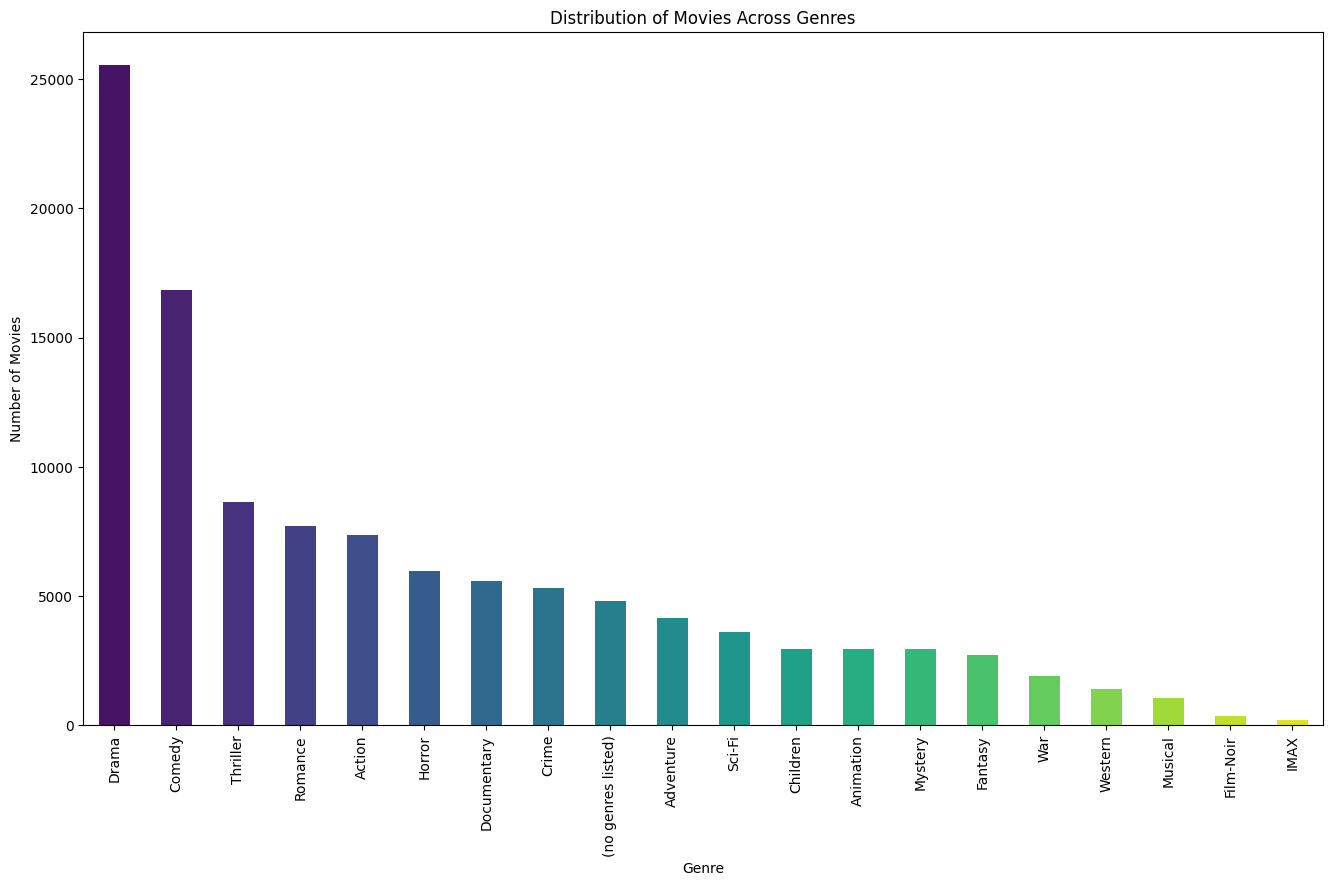

In [18]:
colors = sns.color_palette('viridis', len(movies['genres'].str.get_dummies('|').columns))
figsize = (16, 9)
movies['genres'].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind='bar', color=colors, figsize=figsize)
plt.title('Distribution of Movies Across Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

###  <h3> <font color="teal"> Year-wise Distribution of Movies :    </font> </h3> 

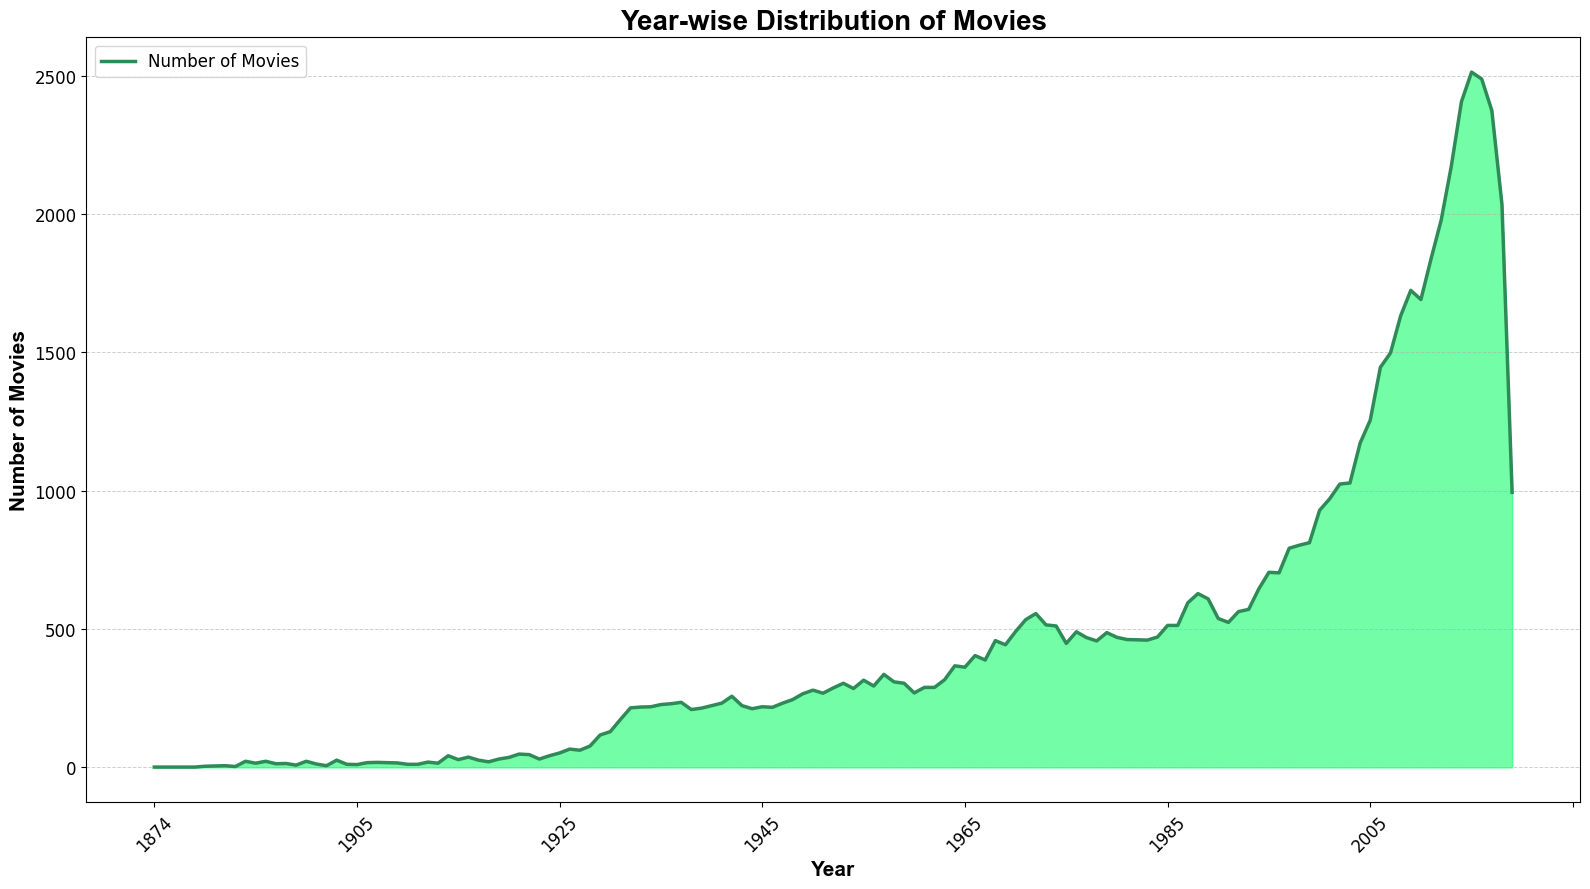

In [19]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
year_counts = movies['year'].value_counts().sort_index()

plot_color = '#2E8B57' 
fill_color1 = '#98FB98' 
fill_color2 = '#00FF7F' 
figsize = (16, 9)

plt.figure(figsize=figsize)
year_counts.plot(color=plot_color, lw=2.5, label='Number of Movies')
plt.fill_between(year_counts.index, year_counts.values, color=fill_color1, alpha=0.6)
plt.fill_between(year_counts.index, 0, year_counts.values, color=fill_color2, alpha=0.4)

plt.title('Year-wise Distribution of Movies', fontsize=20, fontweight='bold', fontname="Arial")
plt.xlabel('Year', fontsize=15, fontweight='bold', fontname="Arial")
plt.ylabel('Number of Movies', fontsize=15, fontweight='bold', fontname="Arial")
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()

plt.show()

###  <h3> <font color="teal"> Trend of Ratings Over Time :    </font> </h3> 

In [20]:
ratings1 = pd.DataFrame()

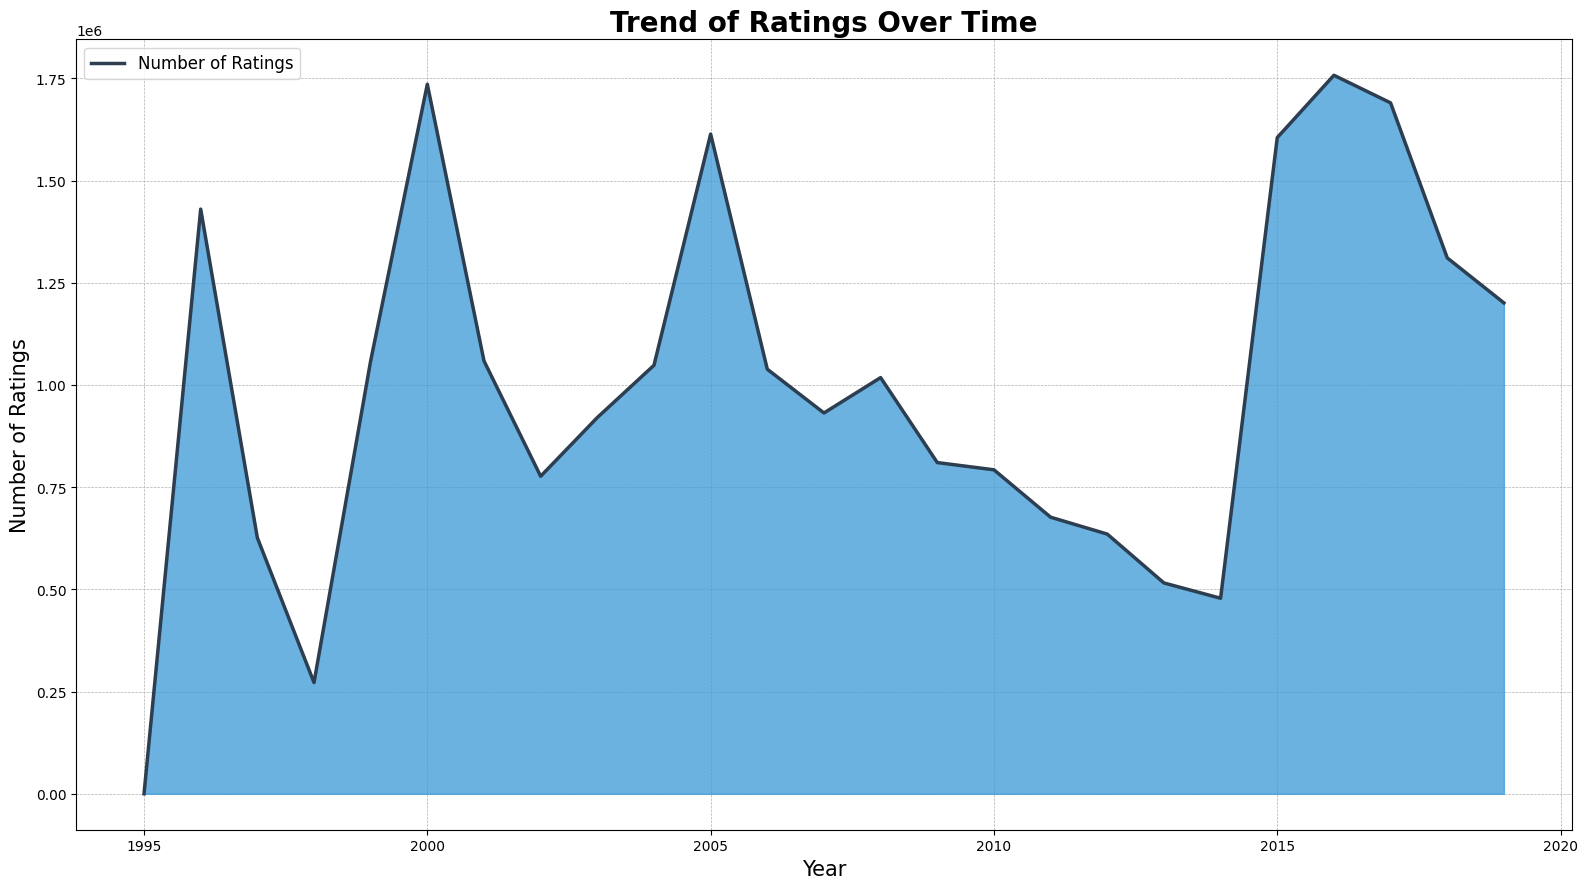

In [21]:
ratings1['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings1['year'] = ratings1['datetime'].dt.year

yearly_ratings = ratings1.groupby('year').size()

plot_color = '#2C3E50'  
fill_color1 = '#3498db'  
fill_color2 = '#ECF0F1' 

plt.figure(figsize=(16, 9))

yearly_ratings.plot(kind='line', color=plot_color, linewidth=2.5, label='Number of Ratings', zorder=5)
plt.fill_between(yearly_ratings.index, yearly_ratings, color=fill_color2, zorder=1)
plt.fill_between(yearly_ratings.index, yearly_ratings, interpolate=True, color=fill_color1, alpha=0.7, zorder=2)

plt.title('Trend of Ratings Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Ratings', fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()

plt.show()

###  <h3> <font color="teal"> Average Ratings by Genre :    </font> </h3> 

In [22]:
all_genres = set()
for genre_string in movies['genres']:
    genres = genre_string.split('|')
    all_genres.update(genres)

In [23]:
genre_ratings = []
for genre in all_genres:
    genre_movies = movies[movies['genres'].str.contains(genre)]
    genre_ratings_df = ratings[ratings['movieId'].isin(genre_movies['movieId'])]
    avg_rating = genre_ratings_df['rating'].mean()
    genre_ratings.append((genre, avg_rating))

genre_ratings = pd.DataFrame(genre_ratings, columns=['Genre', 'Average Rating'])

/var/folders/y4/8bm20ffn1bl86gfs1pr67fl00000gn/T/ipykernel_69148/313115343.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  genre_movies = movies[movies['genres'].str.contains(genre)]


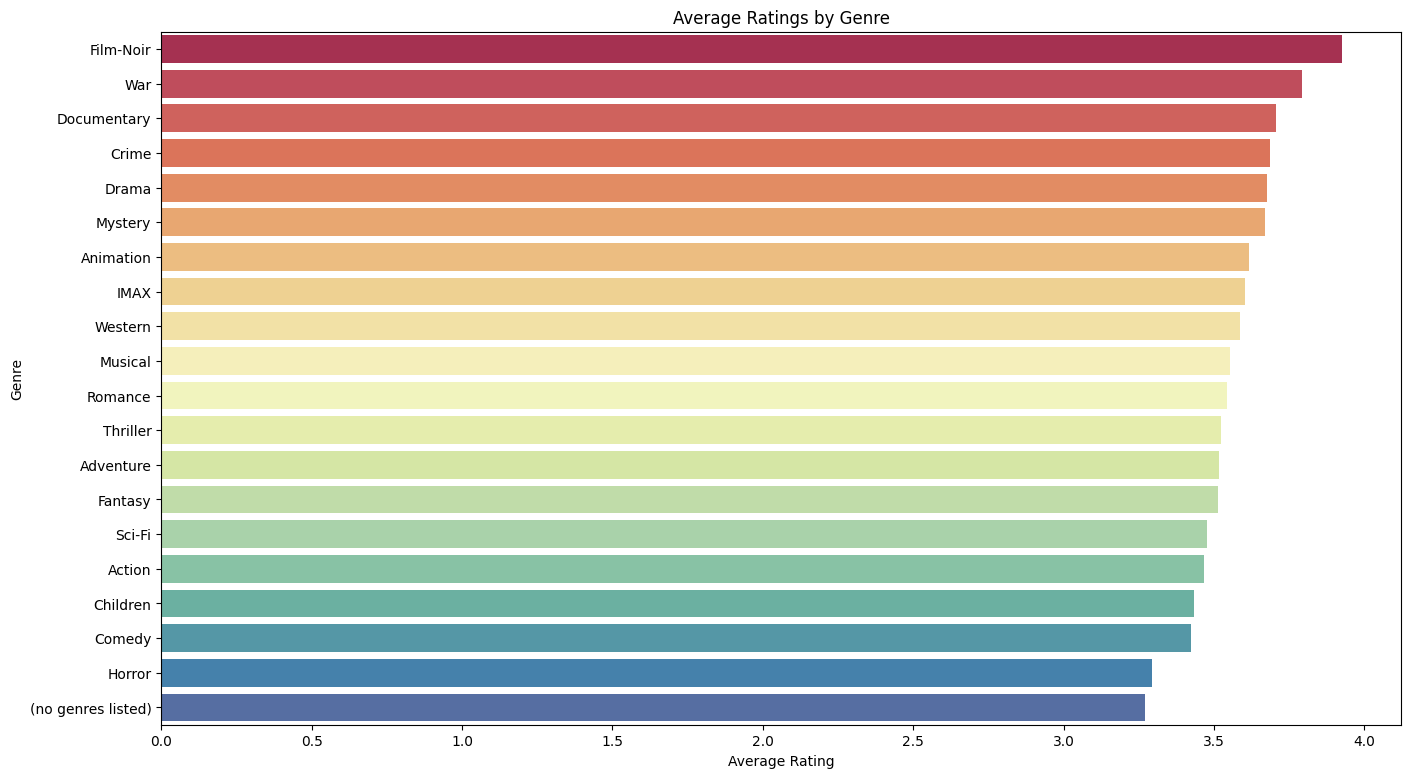

In [24]:
genre_ratings = genre_ratings.sort_values(by='Average Rating', ascending=False)
plt.figure(figsize=(16, 9))
sns.barplot(x='Average Rating', y='Genre', data=genre_ratings, palette='Spectral')
plt.title('Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

###  <h3> <font color="teal"> Word Cloud of Movie Titles :    </font> </h3> 

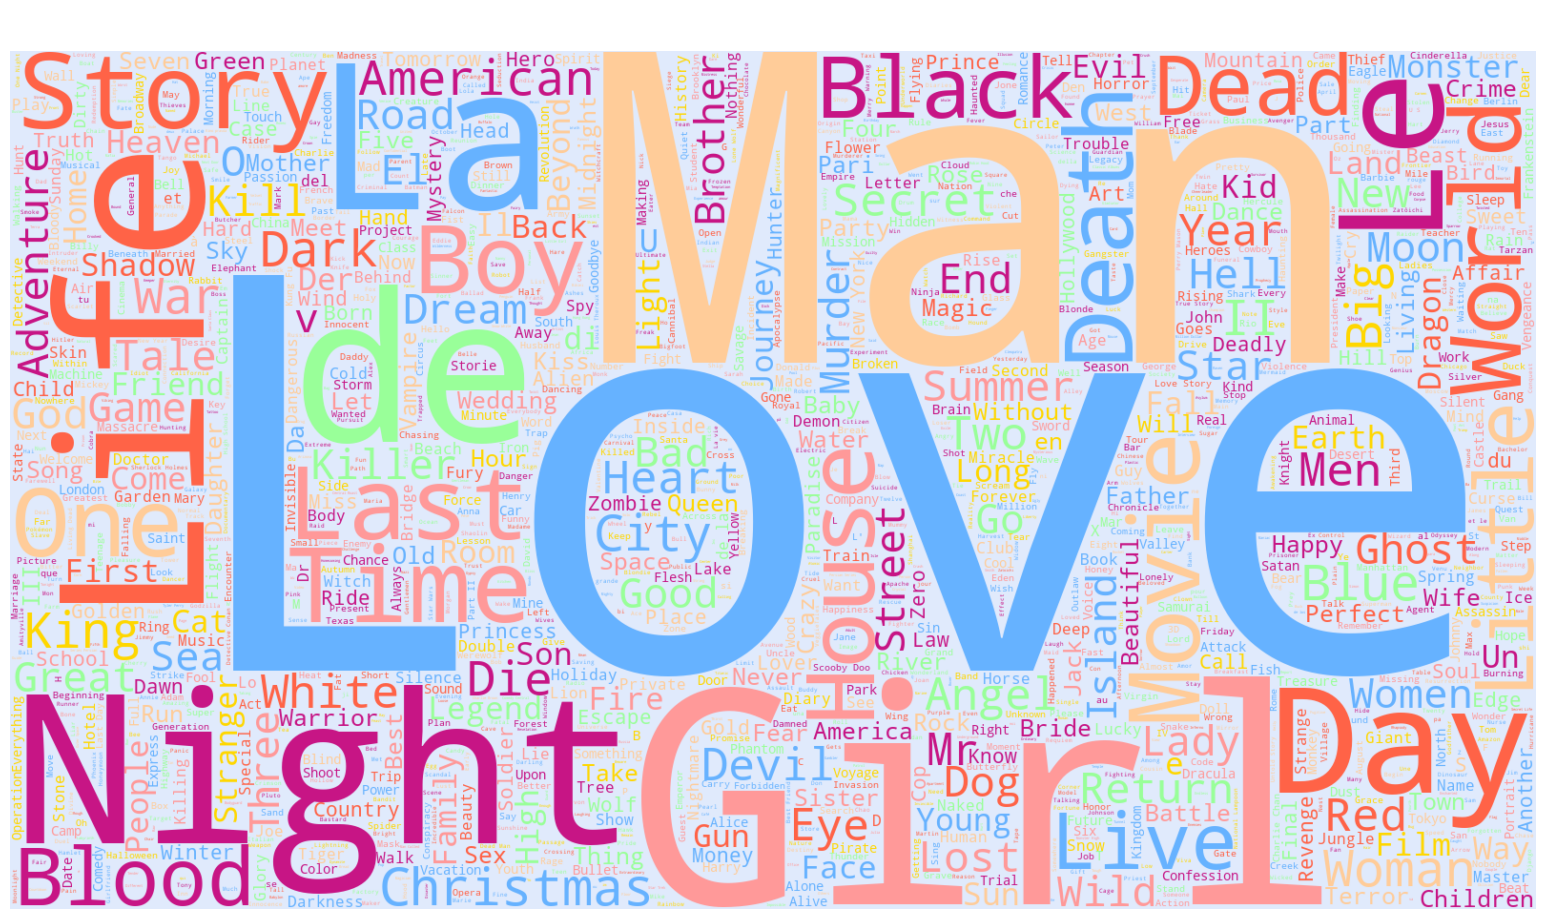

In [25]:
all_titles = ' '.join(movies['title'])

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#FFD700", "#FF6347", "#C71585"]
    return colors[random.randint(0, len(colors) - 1)]

wordcloud = WordCloud(
    width=1600,
    height=900,
    max_words=1500,
    background_color='#e0eafc',
    contour_width=3,
    contour_color='steelblue',
    color_func=color_func
).generate(all_titles)

plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles', fontsize=30, color='white')
plt.tight_layout(pad=0)
plt.show()

###  <h3> <font color="teal"> Average Movie Ratings Over Time :    </font> </h3> 

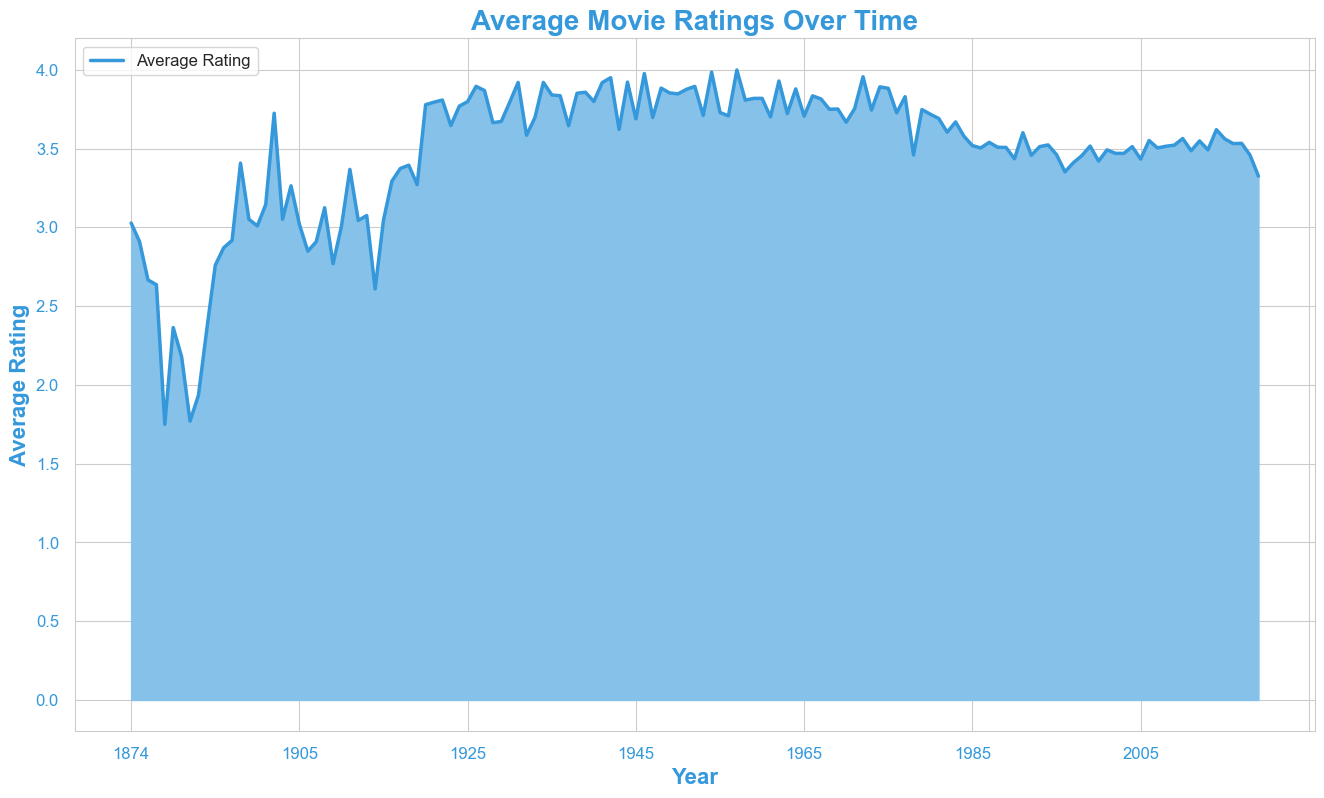

In [26]:
sns.set_style("whitegrid")

merged = pd.merge(ratings, movies, on='movieId')
avg_ratings_per_year = merged.groupby('year')['rating'].mean()

plot_color = '#3498db'  
fill_color = '#85c1e9'  
grid_color = '#ecf0f1'  

plt.figure(figsize=(16, 9))

avg_ratings_per_year.plot(kind='line', color=plot_color, linewidth=2.5, linestyle='-')

plt.fill_between(avg_ratings_per_year.index, avg_ratings_per_year, color=fill_color)

plt.title('Average Movie Ratings Over Time', fontsize=20, fontweight='bold', color=plot_color)
plt.xlabel('Year', fontsize=16, fontweight='bold', color=plot_color)
plt.ylabel('Average Rating', fontsize=16, fontweight='bold', color=plot_color)

plt.tick_params(colors=plot_color, size=8, labelsize=12)

plt.legend(['Average Rating'], fontsize=12, loc='upper left')

plt.show()

###  <h3> <font color="teal"> Number of Movie Ratings Over Time :    </font> </h3> 

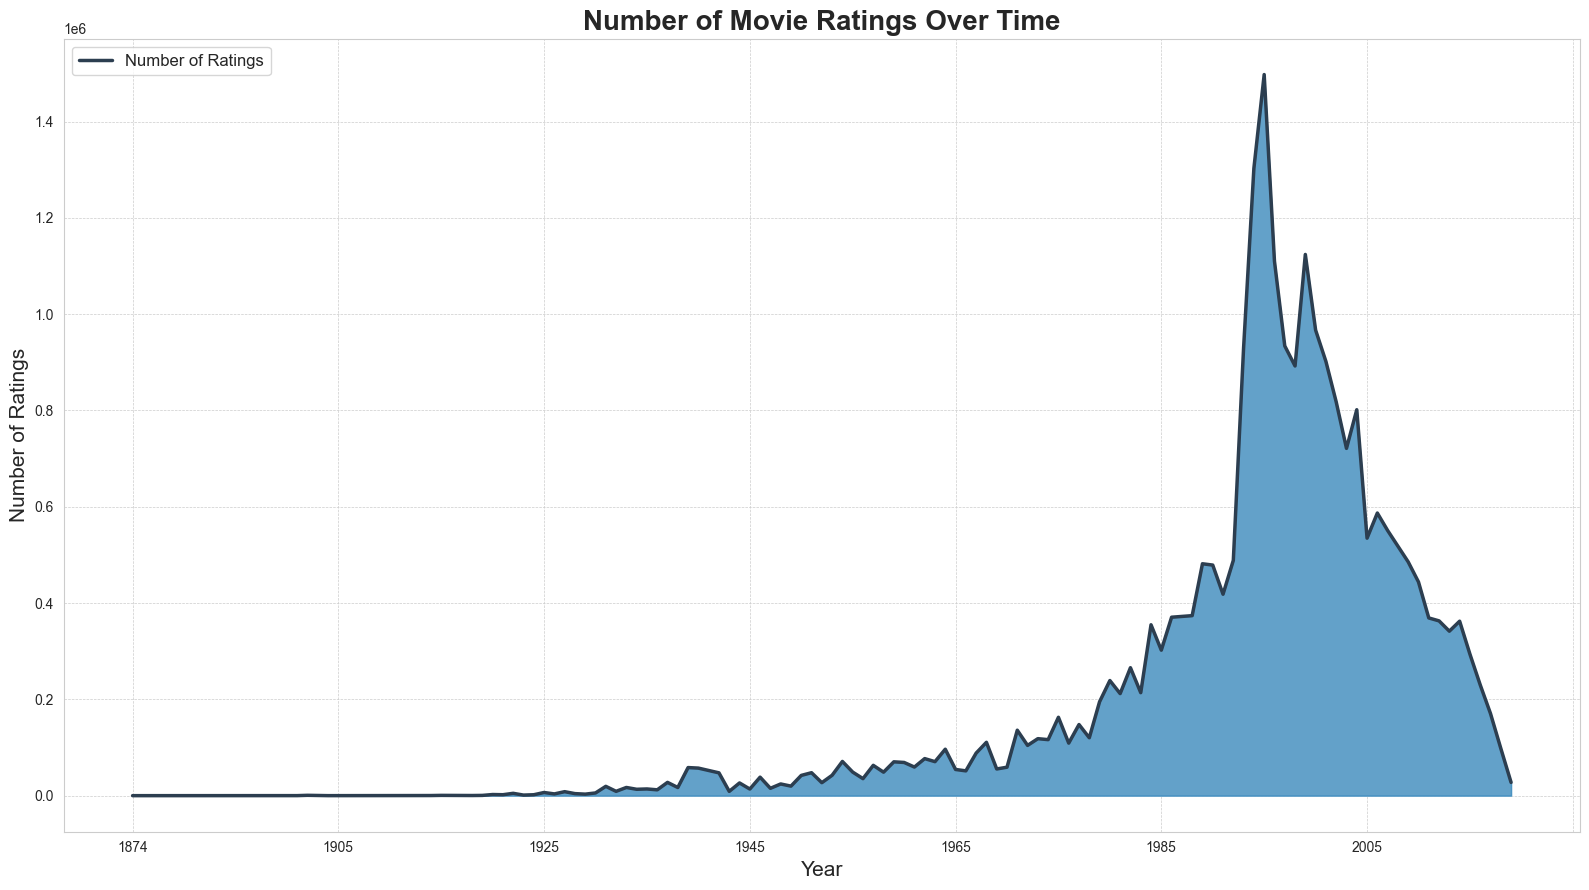

In [27]:
ratings_count_per_year = merged.groupby('year')['rating'].count()

plot_color = '#2C3E50'  
fill_color1 = '#2980B9'  
fill_color2 = '#ECF0F1'  

plt.figure(figsize=(16, 9))

ratings_count_per_year.plot(kind='line', color=plot_color, linewidth=2.5, label='Number of Ratings', zorder=5)
plt.fill_between(ratings_count_per_year.index, ratings_count_per_year, color=fill_color2, zorder=1)
plt.fill_between(ratings_count_per_year.index, ratings_count_per_year, interpolate=True, color=fill_color1, alpha=0.7, zorder=2)

plt.title('Number of Movie Ratings Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Ratings', fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()

plt.show()

###  <h3> <font color="teal"> Number of Movie Ratings Over Time :    </font> </h3> 

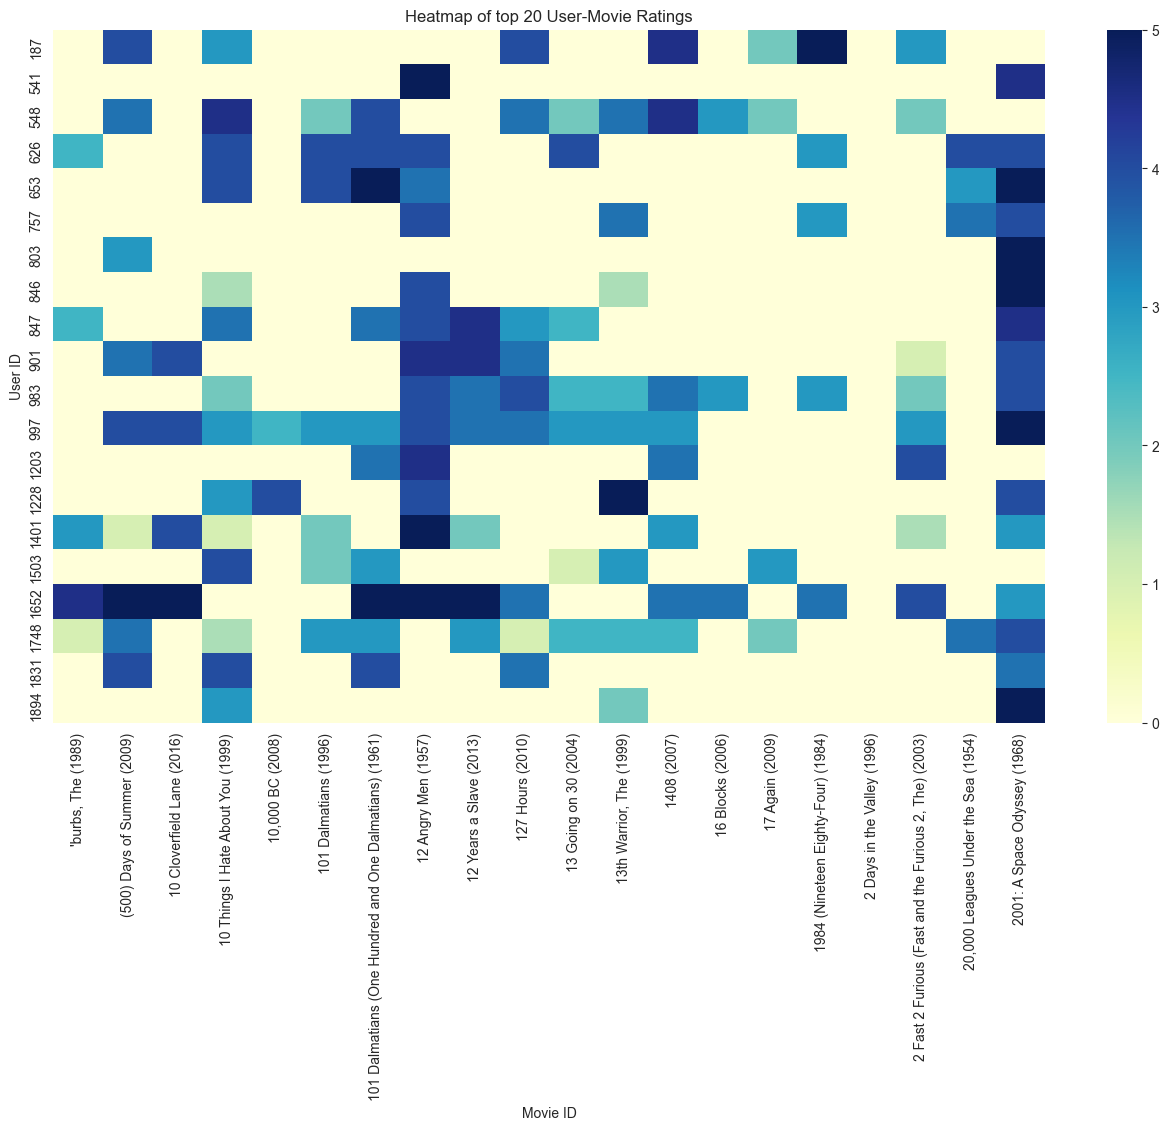

In [28]:
plt.figure(figsize=(16, 9))
sns.heatmap(user_movie.iloc[:20, :20], cmap="YlGnBu", vmin=0, vmax=5)
plt.title('Heatmap of top 20 User-Movie Ratings')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()